# Generalized Linear Models (GLMs)

**Definition:**  
Generalized Linear Models are a broad class of models that extend linear regression to allow the dependent variable to have a distribution other than the normal distribution.

**Key Components of GLMs:**
1. **Random Component**: Specifies the probability distribution of the dependent variable (e.g., Normal, Binomial, Poisson).
2. **Systematic Component**: A linear predictor, $\eta = X\beta$, where $X$ is the design matrix and $\beta$ is the vector of coefficients.
3. **Link Function**: Relates the mean of the distribution, $\mu$, to the linear predictor: $g(\mu) = \eta$.

### Common Examples of GLMs:
| Model              | Distribution    | Link Function   | Use Case                 |
|---------------------|-----------------|-----------------|--------------------------|
| Linear Regression   | Normal          | Identity ($g(\mu) = \mu$) | Predicting continuous outcomes |
| Logistic Regression | Binomial        | Logit ($g(\mu) = \log(\frac{\mu}{1-\mu})$) | Binary classification         |
| Poisson Regression  | Poisson         | Log ($g(\mu) = \log(\mu)$) | Count data modeling          |


### Normal Distribution PDF (Probability Density Function)
$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} e ^ {-\frac{(x - \mu)^2}{2\sigma^2}}
$$


### Exponential Family


$$
F_y = \frac{1}{e^{\alpha \phi}} \left( y \cdot \theta - B(\theta) \right) + C(y, \phi)
$$

/tmp/ipykernel_13553/1488612008.py:9: RuntimeWarning: invalid value encountered in log
  exp = np.log(x)


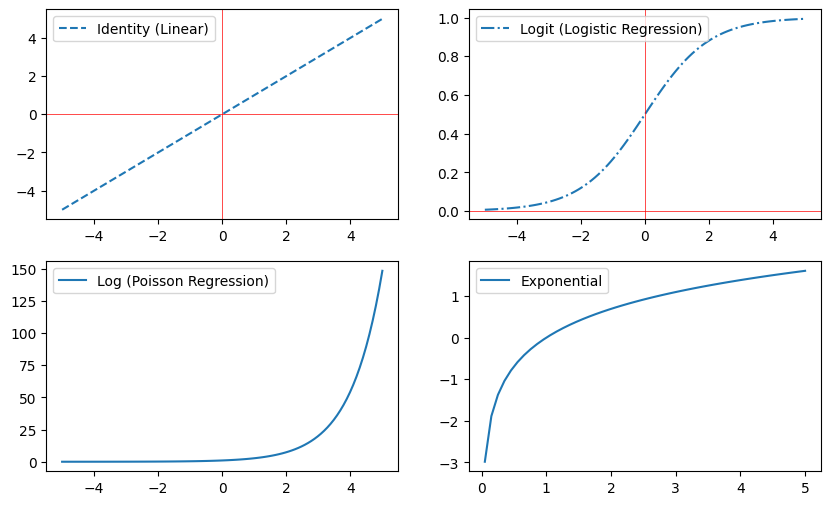

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Link functions
x = np.linspace(-5, 5, 100)
identity = x
logit = 1 / (1 + np.exp(-x))
log = np.exp(x)
exp = np.log(x)
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.plot(x, identity, label="Identity (Linear)", linestyle="--")
plt.axhline(0, color="red", linewidth=0.5)
plt.axvline(0, color="red", linewidth=0.5)
plt.legend()
plt.subplot(2, 2, 2)
plt.plot(x, logit, label="Logit (Logistic Regression)", linestyle="-.")
plt.axhline(0, color="red", linewidth=0.5)
plt.axvline(0, color="red", linewidth=0.5)
plt.legend()
plt.subplot(2, 2, 3)
plt.plot(x, log, label="Log (Poisson Regression)", linestyle="-")
plt.legend()
plt.subplot(2, 2, 4)
plt.plot(x, exp, label="Exponential", linestyle="-")
plt.legend()
plt.show()


### Visualization: Data Distributions
Below are some common distributions used in GLMs, plotted to illustrate their differences.


## Comparing GLMs with Linear Regression

| Aspect                | Linear Regression       | Generalized Linear Models       |
|-----------------------|-------------------------|----------------------------------|
| Dependent Variable    | Continuous (Normal)     | Any (depends on distribution)   |
| Residual Distribution | Normal                  | Exponential family distributions|
| Link Function         | Identity ($g(\mu) = \mu$)| Flexible (e.g., logit, log)     |
| Use Cases             | Continuous outcomes     | Counts, binary outcomes, etc.   |

### Key Points:
- GLMs generalize linear regression by relaxing assumptions about the distribution of the dependent variable.
- Link functions allow flexible modeling of relationships between predictors and outcomes.


### Understanding Bernoulli Distribution

---
### Problem:  
Given a coin is flipped 10 times, find the probabilities of getting:
1. At least 1 head
2. At least 1 tail
3. Exactly 1 head
4. Exactly 2 heads
---
### **Step 1: Binomial Distribution Formula**

For a binomial distribution, the probability of getting exactly \(k\) successes (e.g., heads) in \(n\) trials (e.g., flips) is given by the **binomial probability mass function** (PMF):

$$
P(X = k) = \binom{n}{k} p^k (1-p)^{n-k}
$$
Where:
- $(n$) is the number of trials (in this case, 10 flips)
- $(k$) is the number of successes (e.g., heads)
- $(p$) is the probability of success on each trial (for a fair coin, $(p = 0.5$))

For this example, we are dealing with a fair coin, so $(p = 0.5$).
---
### **Step 2: Probability of Getting At Least 1 Head**

The probability of getting at least 1 head is the complement of the probability of getting 0 heads (i.e., no heads at all):

$$
P(\text{at least 1 head}) = 1 - P(\text{0 heads})
$$

Using the binomial formula, $(P(\text{0 heads})$) is:
$$
P(X = 0) = \binom{10}{0} (0.5)^0 (0.5)^{10} = (1) \times (1) \times (0.5)^{10} = \frac{1}{1024}
$$
Thus,
$$
P(\text{at least 1 head}) = 1 - \frac{1}{1024} = \frac{1023}{1024}
$$
---
### **Step 3: Probability of Getting At Least 1 Tail**

Since the coin flips are independent, getting at least 1 tail is complementary to getting 0 tails (i.e., 10 heads). Therefore, the probability of getting at least 1 tail is:

$$
P(\text{at least 1 tail}) = 1 - P(\text{0 tails})
$$
The probability of getting 0 tails is the same as the probability of getting 10 heads:
$$
P(X = 10) = \binom{10}{10} (0.5)^{10} = 1 \times (0.5)^{10} = \frac{1}{1024}
$$
Thus,
$$
P(\text{at least 1 tail}) = 1 - \frac{1}{1024} = \frac{1023}{1024}
$$
---
### **Step 4: Probability of Getting Exactly 1 Head**

The probability of getting exactly 1 head is given by the binomial formula for \(k = 1\):

$$
P(X = 1) = \binom{10}{1} (0.5)^1 (0.5)^{9} = 10 \times (0.5)^{10} = \frac{10}{1024}
$$
---
### **Step 5: Probability of Getting Exactly 2 Heads**

The probability of getting exactly 2 heads is given by the binomial formula for \(k = 2\):

$$
P(X = 2) = \binom{10}{2} (0.5)^2 (0.5)^{8} = 45 \times (0.5)^{10} = \frac{45}{1024}
$$

---

## Example: Poisson Distribution

#### Problem:
A customer service center receives an average of 4 calls per hour. Using the **Poisson distribution**, calculate the following probabilities:
1. No calls in an hour ($P(X = 0)$).
2. Exactly 3 calls in an hour $P(X = 3)$.
3. At least 2 calls in an hour $P(X \geq 2)$.
4. Less than 3 calls in an hour $P(X < 3)$.

---



### **Step 1: Poisson Distribution Formula**
The **Poisson probability mass function** is given by:

$$
P(X = x) = \frac{\lambda^x e^{-\lambda}}{x!}
$$

Where:
- $X$ is the number of events (e.g., calls received),
- $\lambda$ is the average number of events in a given time interval (mean rate, 4 calls/hour in this example),
- $x$ is the number of events we want the probability for.

---

### **Step 2: Solve Each Probability**

#### **1. Probability of No Calls (\(P(X = 0)\)):**

Using \(\lambda = 4\) and \(k = 0\):
$$
P(X = 0) = \frac{4^0 e^{-4}}{0!} = \frac{1 \cdot e^{-4}}{1} = e^{-4}
$$

Numerically:
$$
P(X = 0) = e^{-4} \approx 0.0183
$$

---

#### **2. Probability of Exactly 3 Calls (\(P(X = 3)\)):**

Using \(\lambda = 4\) and \(k = 3\):
$$
P(X = 3) = \frac{4^3 e^{-4}}{3!} = \frac{64 \cdot e^{-4}}{6}
$$

Numerically:
$$
P(X = 3) = \frac{64 \cdot 0.0183}{6} \approx 0.1954
$$

---

#### **3. Probability of At Least 2 Calls (\(P(X \geq 2)\)):**

The complement of \(P(X < 2)\) gives:
$$
P(X \geq 2) = 1 - P(X < 2)
$$
Where:
$$
P(X < 2) = P(X = 0) + P(X = 1)
$$

For \(P(X = 1)\), use \(\lambda = 4\) and \(k = 1\):
$$
P(X = 1) = \frac{4^1 e^{-4}}{1!} = \frac{4 \cdot e^{-4}}{1} = 4 \cdot 0.0183 \approx 0.0733
$$

Thus:
$$
P(X < 2) = P(X = 0) + P(X = 1) = 0.0183 + 0.0733 = 0.0916
$$
And:
$$
P(X \geq 2) = 1 - 0.0916 = 0.9084
$$

---

#### **4. Probability of Less Than 3 Calls (\(P(X < 3)\)):**

$$
P(X < 3) = P(X = 0) + P(X = 1) + P(X = 2)
$$

For \(P(X = 2)\), use \(\lambda = 4\) and \(k = 2\):
$$
P(X = 2) = \frac{4^2 e^{-4}}{2!} = \frac{16 \cdot e^{-4}}{2} = 8 \cdot 0.0183 \approx 0.1464
$$

Thus:
$$
P(X < 3) = P(X = 0) + P(X = 1) + P(X = 2)
$$
$$
P(X < 3) = 0.0183 + 0.0733 + 0.1464 = 0.2380
$$

---

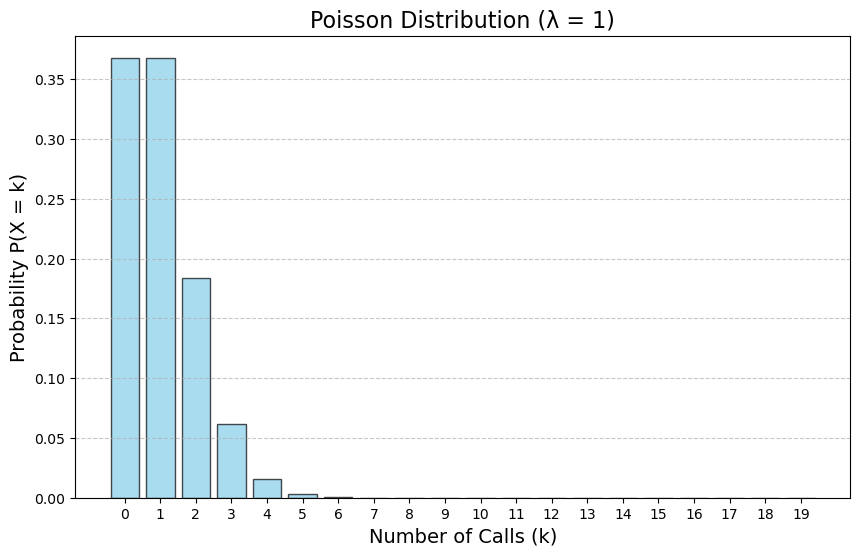

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Parameters
lambda_value = 1  # Mean rate
k_values = np.arange(0, 20)  # Possible number of events

# Poisson PMF
pmf_values = poisson.pmf(k_values, mu=lambda_value)

# Plot
plt.figure(figsize=(10, 6))
plt.bar(k_values, pmf_values, color='skyblue', edgecolor='black', alpha=0.7)
plt.title(f'Poisson Distribution (λ = {lambda_value})', fontsize=16)
plt.xlabel('Number of Calls (k)', fontsize=14)
plt.ylabel('Probability P(X = k)', fontsize=14)
plt.xticks(k_values)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


| Aspect                  | Logistic Regression           | Poisson Regression              |
|-------------------------|-------------------------------|----------------------------------|
| Dependent Variable      | Binary (0 or 1)              | Counts (0, 1, 2, ...)           |
| Link Function           | Logit ($g(\mu) = \log\frac{\mu}{1-\mu}$) | Log ($g(\mu) = \log(\mu)$)      |
| Inverse Link            | Sigmoid ($\mu = \frac{1}{1+e^{-\eta}}$) | Exponential ($\mu = e^{\eta}$) |
| Use Cases               | Binary classification         | Count data modeling             |


## Key Takeaways

- Generalized Linear Models extend the flexibility of linear regression to handle diverse data types.<br><br>
- The choice of link function and distribution should align with the nature of the dependent variable.

### Python Implementation for Classification Tasks for Binomial Data 

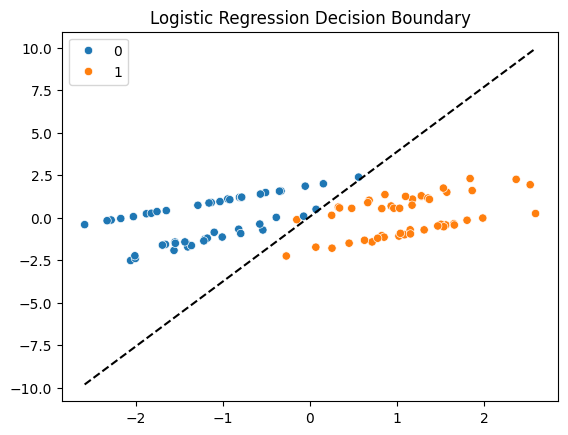

In [37]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic binary data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Plot the decision boundary
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, )
coef = model.coef_[0]
intercept = model.intercept_

# Decision boundary line
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(coef[0] * x_vals + intercept) / coef[1]
plt.plot(x_vals, y_vals, color='black', linestyle='--')
plt.title('Logistic Regression Decision Boundary')
plt.show()


### Using Statsmodels Library GLM Functionality

In [38]:
import warnings

warnings.filterwarnings("ignore")

X_with_intercept = sm.add_constant(X)

# Fit logistic regression using statsmodels GLM
model = sm.GLM(y, X_with_intercept, family=sm.families.Binomial())
result = model.fit()
print(result.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       97
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 20 Jan 2025   Deviance:                   5.2422e-09
Time:                        13:27:01   Pearson chi2:                 2.62e-09
No. Iterations:                    29   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.8114   6.37e+04      0.002      0.9

### Comparison between both Methods

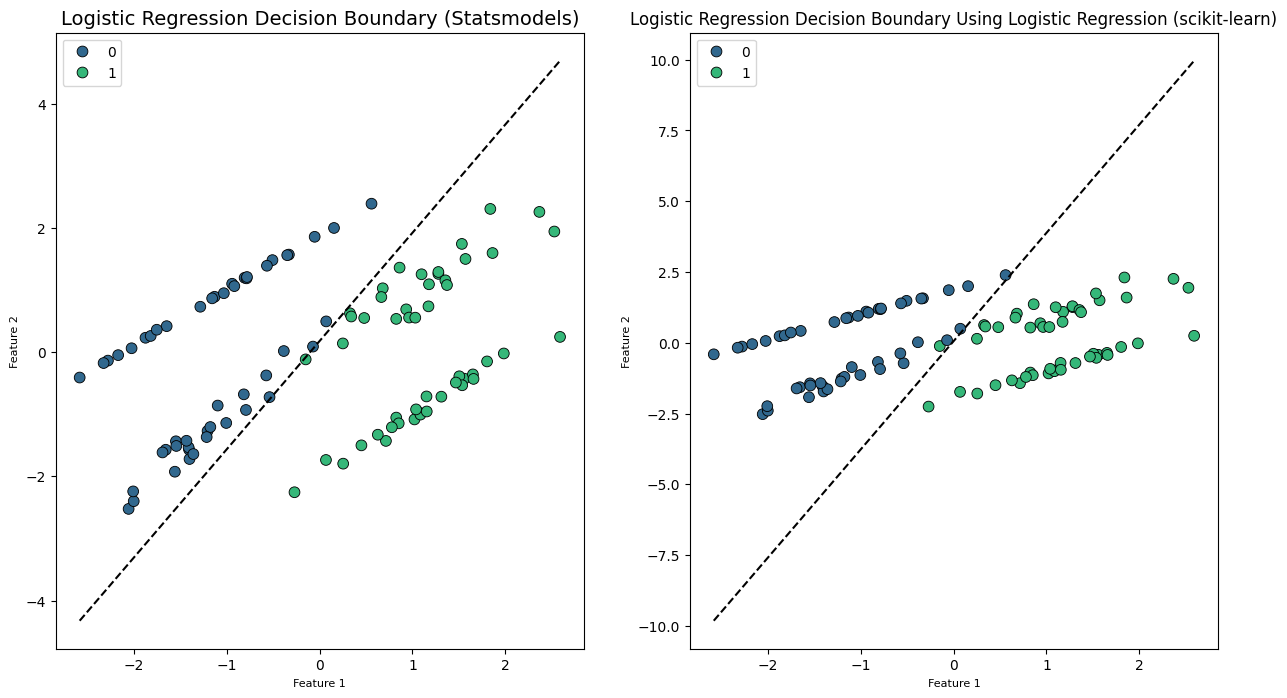

In [39]:
# Extract coefficients
coef = result.params
intercept = coef[0]  # Intercept
slope1 = coef[1]  # Coefficient for X1
slope2 = coef[2]  # Coefficient for X2

# Plot the data

# Decision boundary line
s_x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
s_y_vals = (
    -(slope1 * s_x_vals + intercept) / slope2
)  # Solve for X2 in terms of X1 and coefficients
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="viridis", edgecolor="k", s=60)
plt.plot(s_x_vals, s_y_vals, color="black", linestyle="--")
plt.title("Logistic Regression Decision Boundary (Statsmodels)", fontsize=14)
plt.xlabel("Feature 1", fontsize=8)
plt.ylabel("Feature 2", fontsize=8)
plt.legend()
# plt.grid(True)
plt.subplot(1, 2, 2)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="viridis", edgecolor="k", s=60)
plt.plot(x_vals, y_vals, color="black", linestyle="--")
plt.title(
    "Logistic Regression Decision Boundary Using Logistic Regression (scikit-learn)"
)
plt.xlabel("Feature 1", fontsize=8)
plt.ylabel("Feature 2", fontsize=8)
plt.legend()
plt.show()


### Poisson Distribution Examples

In [40]:
import statsmodels.api as sm
import numpy as np

# Simulated data
np.random.seed(42)
X = np.random.rand(100, 1) * 10
y = np.random.poisson(lam=np.exp(0.5 + 0.3 * X).flatten(), size=100)

# Add intercept
X_with_intercept = sm.add_constant(X)

# Fit Poisson regression
poisson_model = sm.GLM(y, X_with_intercept, family=sm.families.Poisson()).fit()

print(poisson_model.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -237.82
Date:                Mon, 20 Jan 2025   Deviance:                       121.35
Time:                        13:27:02   Pearson chi2:                     110.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9988
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4380      0.099      4.439      0.0

In [41]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [36]:
# Generate synthetic data
np.random.seed(42)

# Number of observations
n = 10000

# Predictors
X1 = np.random.normal(size=n)
X2 = np.random.normal(size=n)

# True coefficients
beta_0 = -1.5  # Intercept
beta_1 = 2.0   # Coefficient for X1
beta_2 = -0.5  # Coefficient for X2

# Linear predictor
eta = beta_0 + beta_1 * X1 + beta_2 * X2

# Convert to probabilities using logistic function
prob = 1 / (1 + np.exp(-eta))

# Simulate binary response
Y = np.random.binomial(1, prob, size=n)

# Create a DataFrame
data = pd.DataFrame({'Y': Y, 'X1': X1, 'X2': X2})


In [20]:
data

,Y,X1,X2
0,0,0.496714,-0.678495
1,1,-0.138264,-0.305499
2,0,0.647689,-0.597381
3,0,1.523030,0.110418
4,0,-0.234153,1.197179
...,...,...,...
9995,0,1.301102,0.387827
9996,0,-1.998345,1.377367
9997,0,-0.705317,0.378354
9998,0,0.495766,1.713530


In [21]:
# Define the model
model = smf.glm(formula='Y ~ X1 + X2', data=data, family=sm.families.Binomial())

# Fit the model
results = model.fit()

# Summary of the model
print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3796.1
Date:                Mon, 20 Jan 2025   Deviance:                       7592.3
Time:                        10:24:58   Pearson chi2:                 1.14e+04
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3493
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5909      0.036    -44.353      0.0

In [22]:
# Predict probabilities
data['Predicted_Prob'] = results.predict()

# Predict binary outcome
data['Predicted_Class'] = (data['Predicted_Prob'] > 0.5).astype(int)

# Display first few rows
print(data.head())


   Y        X1        X2  Predicted_Prob  Predicted_Class
0  0  0.496714 -0.678495        0.451884                0
1  1 -0.138264 -0.305499        0.152156                0
2  0  0.647689 -0.597381        0.519838                1
3  0  1.523030  0.110418        0.822460                1
4  0 -0.234153  1.197179        0.062080                0


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Confusion matrix
cm = confusion_matrix(data['Y'], data['Predicted_Class'])
print("Confusion Matrix:\n", cm)

# Accuracy
accuracy = accuracy_score(data['Y'], data['Predicted_Class'])
print("Accuracy:", accuracy)



Confusion Matrix:
 [[6588  596]
 [1117 1699]]
Accuracy: 0.8287


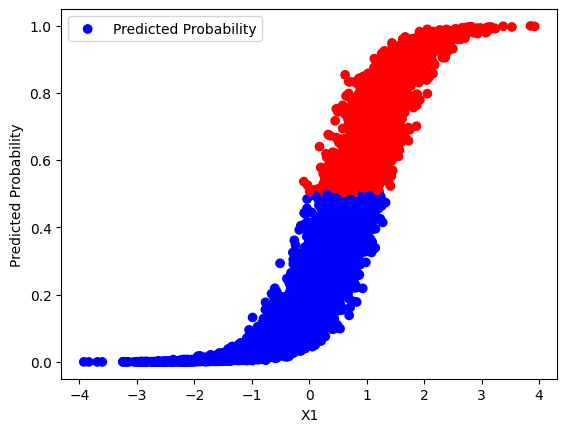

In [24]:
colors = ['red' if i==1 else 'blue' for i in data['Predicted_Class']]
plt.scatter(data['X1'], data['Predicted_Prob'], color=colors, label='Predicted Probability')
plt.xlabel('X1')
plt.ylabel('Predicted Probability')
plt.legend()
plt.show()


### Poisson Distribution

In [25]:
# Set random seed for reproducibility
np.random.seed(42)

# Number of observations
n = 200

# Predictors
X1 = np.random.normal(2, 1, size=n)  # Continuous predictor
X2 = np.random.binomial(1, 0.5, size=n)  # Binary predictor

# True coefficients
beta_0 = 1.0  # Intercept
beta_1 = 0.5  # Coefficient for X1
beta_2 = -0.7  # Coefficient for X2

# Linear predictor
eta = beta_0 + beta_1 * X1 + beta_2 * X2

# Convert to expected counts (Poisson mean)
mu = np.exp(eta)

# Simulate Poisson response variable
Y = np.random.poisson(mu)

# Create a DataFrame
data = pd.DataFrame({'Y': Y, 'X1': X1, 'X2': X2})
data.head()

,Y,X1,X2
0,6,2.496714,1
1,3,1.861736,1
2,7,2.647689,1
3,9,3.523030,1
4,5,1.765847,0


In [26]:
# Define the model
model = smf.glm(formula='Y ~ X1 + X2', data=data, family=sm.families.Poisson())

# Fit the model
results = model.fit()

# Display model summary
print(results.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                      Y   No. Observations:                  200
Model:                            GLM   Df Residuals:                      197
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -437.32
Date:                Mon, 20 Jan 2025   Deviance:                       195.42
Time:                        10:25:07   Pearson chi2:                     183.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.8611
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0666      0.079     13.472      0.0

In [28]:
# Predict expected counts (mean of the Poisson distribution)
data['Predicted_Mean'] = results.predict(data)

# Display first few rows
print(data.head())


   Y        X1  X2  Predicted_Mean
0  6  2.496714   1        4.818553
1  3  1.861736   1        3.544282
2  7  2.647689   1        5.183599
3  9  3.523030   1        7.916116
4  5  1.765847   0        6.825772


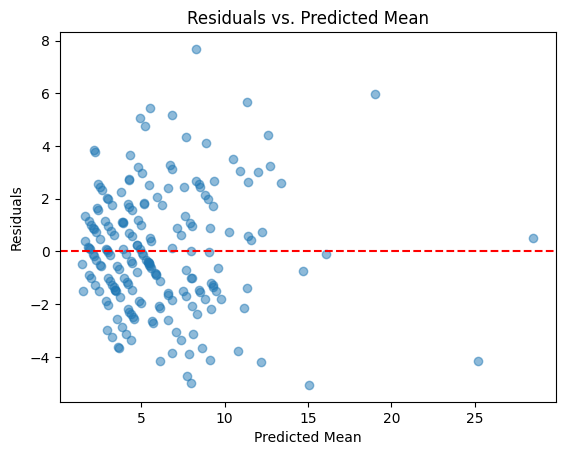

In [29]:
# Compute residuals
data['Residuals'] = data['Y'] - data['Predicted_Mean']

# Visualize residuals
plt.scatter(data['Predicted_Mean'], data['Residuals'], alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Mean')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Mean')
plt.show()


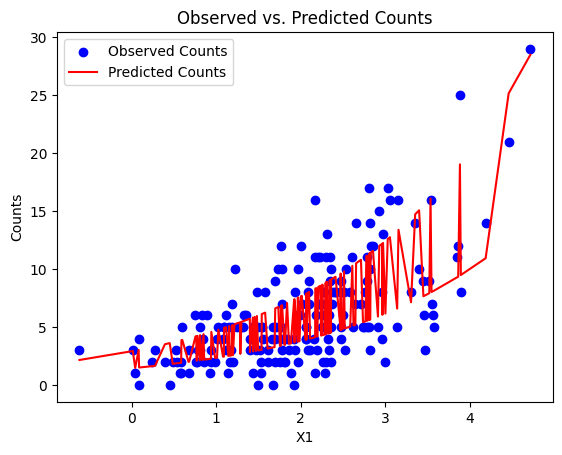

In [30]:
# Sort data for plotting
data_sorted = data.sort_values(by='X1')

# Plot observed vs. predicted counts
plt.scatter(data_sorted['X1'], data_sorted['Y'], color='blue', label='Observed Counts')
plt.plot(data_sorted['X1'], data_sorted['Predicted_Mean'], color='red', label='Predicted Counts')
plt.xlabel('X1')
plt.ylabel('Counts')
plt.legend()
plt.title('Observed vs. Predicted Counts')
plt.show()


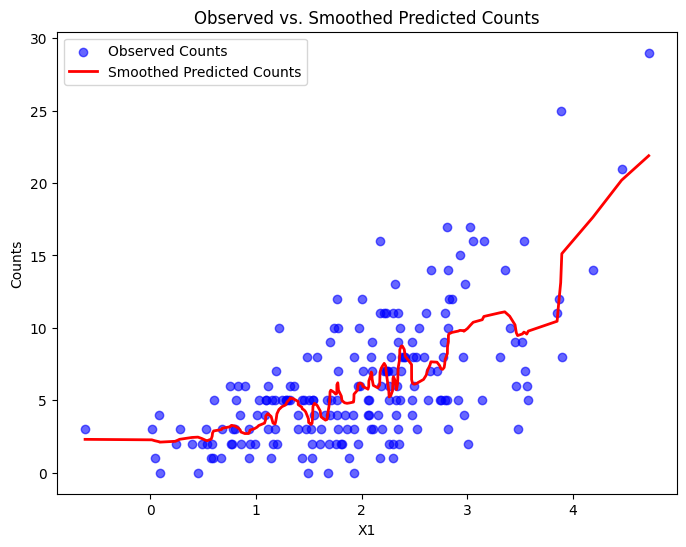

In [31]:
from scipy.ndimage import gaussian_filter1d

# Assuming `data_sorted` is already created:
# Sort data by X1 (important for proper smoothing visualization)
data_sorted = data.sort_values(by='X1')

# Apply smoothing to the predicted values
smoothed_predicted_mean = gaussian_filter1d(data_sorted['Predicted_Mean'], sigma=2)

# Plot observed vs. predicted counts with smoothing
plt.figure(figsize=(8, 6))
plt.scatter(data_sorted['X1'], data_sorted['Y'], color='blue', alpha=0.6, label='Observed Counts')
plt.plot(data_sorted['X1'], smoothed_predicted_mean, color='red', label='Smoothed Predicted Counts', linewidth=2)
plt.xlabel('X1')
plt.ylabel('Counts')
plt.title('Observed vs. Smoothed Predicted Counts')
plt.legend()
plt.show()

In [13]:
# Step 6: Evaluation
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(data['Y'], data['Predicted_Mean'])
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 5.3083
